# 📊 Analyse et Visualisation des Données des Entraîneurs

## 📝 Description des colonnes du dataset


Le dataset **all_coaches.csv** contient des informations détaillées sur les entraîneurs de football. Voici une description de chaque colonne :

1. **`name`** *(string)* : Nom de l'entraîneur.
2. **`club`** *(string)* : Nom du club actuel de l'entraîneur. Peut être `"Without Club"` si l'entraîneur est sans équipe.
3. **`birth_date`** *(string - format date)* : Date de naissance de l'entraîneur.
4. **`age`** *(int)* : Âge de l'entraîneur en années.
5. **`place_of_birth`** *(string)* : Ville ou lieu de naissance de l'entraîneur.
6. **`citizenship`** *(string)* : Nationalité de l'entraîneur.
7. **`appointment_date`** *(string - format date, parfois null)* : Date à laquelle l'entraîneur a été nommé à son poste actuel.
8. **`contract_until_date`** *(string - format date, parfois null)* : Date de fin du contrat actuel de l'entraîneur.
9. **`coaching_licence`** *(string)* : Licence ou certification de coaching détenue par l'entraîneur (ex : UEFA Pro Licence).
10. **`avg_term_as_coach`** *(string - format années, ex: "3.5 Years")* : Durée moyenne d'un mandat de l'entraîneur dans un club.
11. **`preffered_formation`** *(string, parfois null)* : Schéma tactique préféré de l'entraîneur (ex: "4-3-3 Attacking", "3-4-2-1").
12. **`current_league`** *(string)* : Nom de la ligue dans laquelle l'entraîneur travaille actuellement (ex: "Premier League").
13. **`current_league_country`** *(string)* : Pays de la ligue actuelle de l'entraîneur (ex: "England", "Spain").
    

## 📂 Chargement des données et aperçu

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv("/kaggle/input/datacoachs/all_coaches.csv")

# Afficher les premières lignes
df.head()


,name,club,birth_date,age,place_of_birth,citizenship,appointment_date,contract_until_date,coaching_licence,avg_term_as_coach,preffered_formation,current_league,current_league_country
0,Pep Guardiola,Man City,1971-01-18,50,Santpedor,Spain,2016-07-01,2023-06-30,SEG,3.38 Years,4-3-3 Attacking,Premier League,England
1,Ole Gunnar Solskjaer,Without Club,1973-02-26,48,Kristiansund,Norway,NaN,NaN,Jim Solbakken,2.05 Years,4-2-3-1,Premier League,England
2,Thomas Tuchel,Chelsea,1973-08-29,48,Krumbach,Germany,2021-01-26,2024-06-30,Dr. Olaf Meinking,2.28 Years,3-4-2-1,Premier League,England
3,Jürgen Klopp,Liverpool,1967-06-16,54,Stuttgart,Germany,2015-10-08,2024-06-30,UEFA Pro Licence,5.40 Years,4-3-3 Attacking,Premier League,England
4,Nuno Espírito Santo,Without Club,1974-01-25,47,São Tomé,Portugal,NaN,NaN,Gestifute,1.76 Years,3-4-3,Premier League,England


## 📊 Visualisations Significatives

### 🔹 1. Distribution des âges des entraîneurs

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


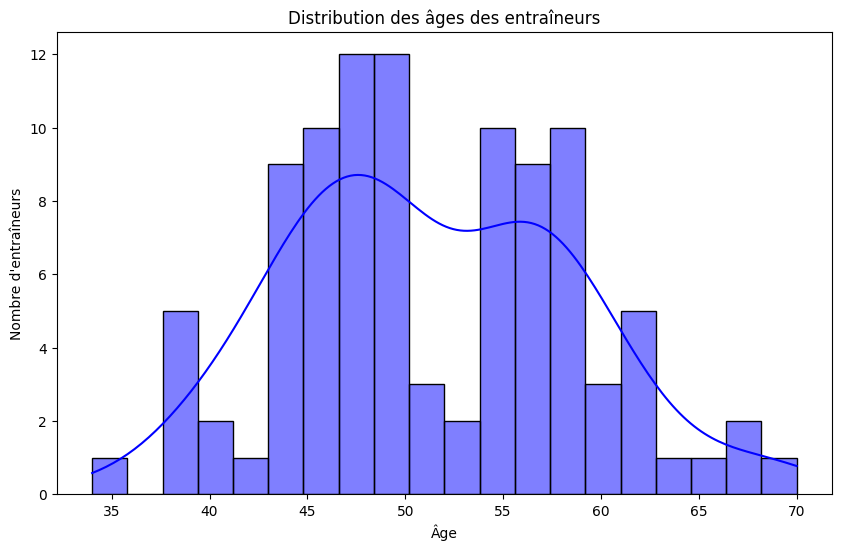

In [19]:

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Distribution des âges des entraîneurs")  # 🔹 Guillemets doubles
plt.xlabel("Âge")  # 🔹 Guillemets doubles
plt.ylabel("Nombre d'entraîneurs")  # 🔹 Guillemets doubles pour éviter l'erreur
plt.show()


### 🔹 2. Top 10 des nationalités représentées

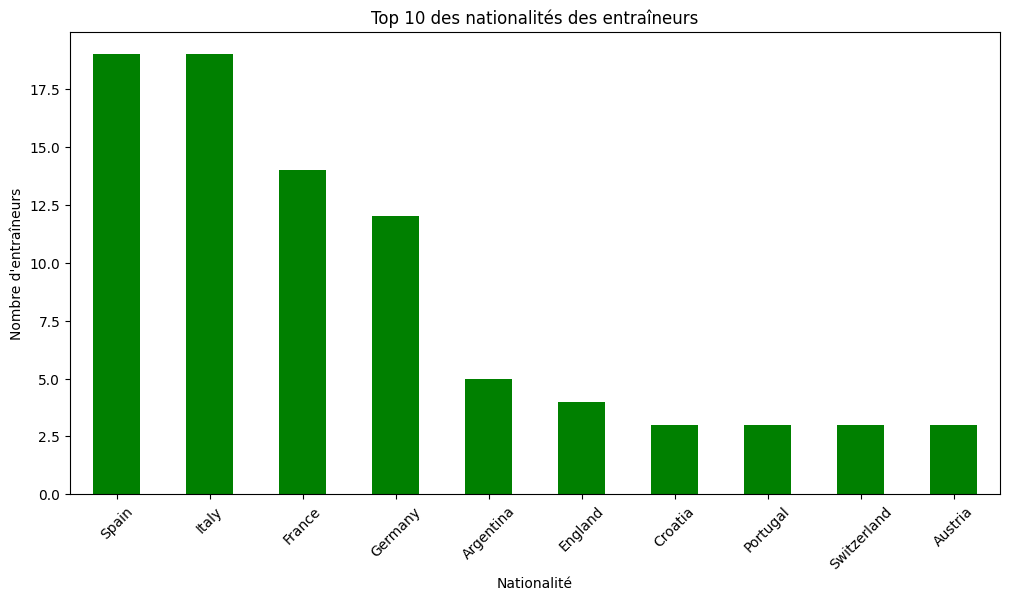

In [20]:

plt.figure(figsize=(12,6))
df["citizenship"].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title("Top 10 des nationalités des entraîneurs")
plt.xlabel("Nationalité")
plt.ylabel("Nombre d'entraîneurs")
plt.xticks(rotation=45)
plt.show()


### 🔹 3. Formations tactiques les plus utilisées

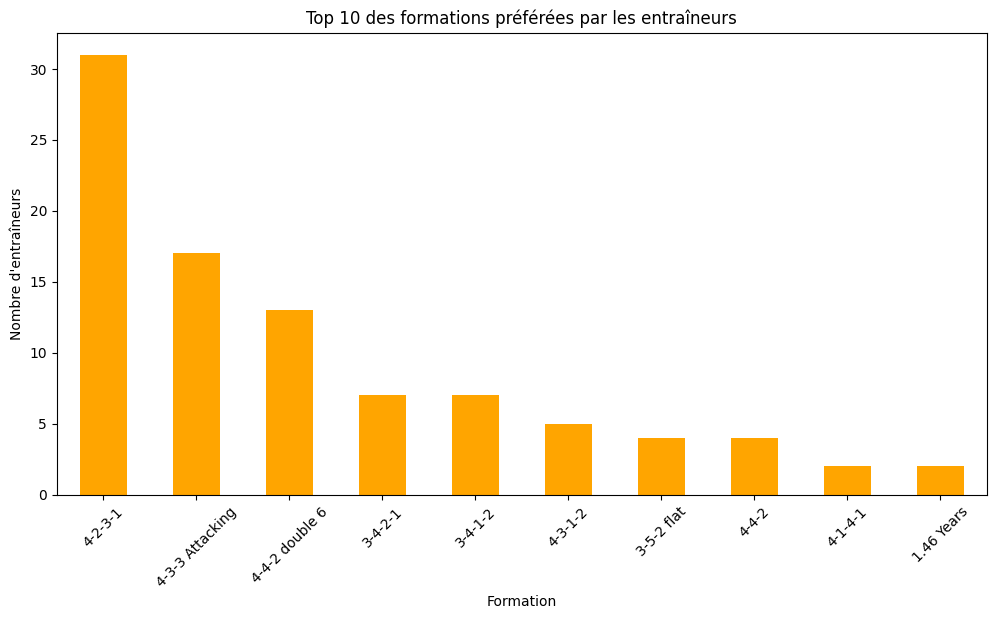

In [21]:

plt.figure(figsize=(12,6))
df["preffered_formation"].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title("Top 10 des formations préférées par les entraîneurs")
plt.xlabel("Formation")
plt.ylabel("Nombre d'entraîneurs")
plt.xticks(rotation=45)
plt.show()


### 🔹 4. Répartition des entraîneurs par club

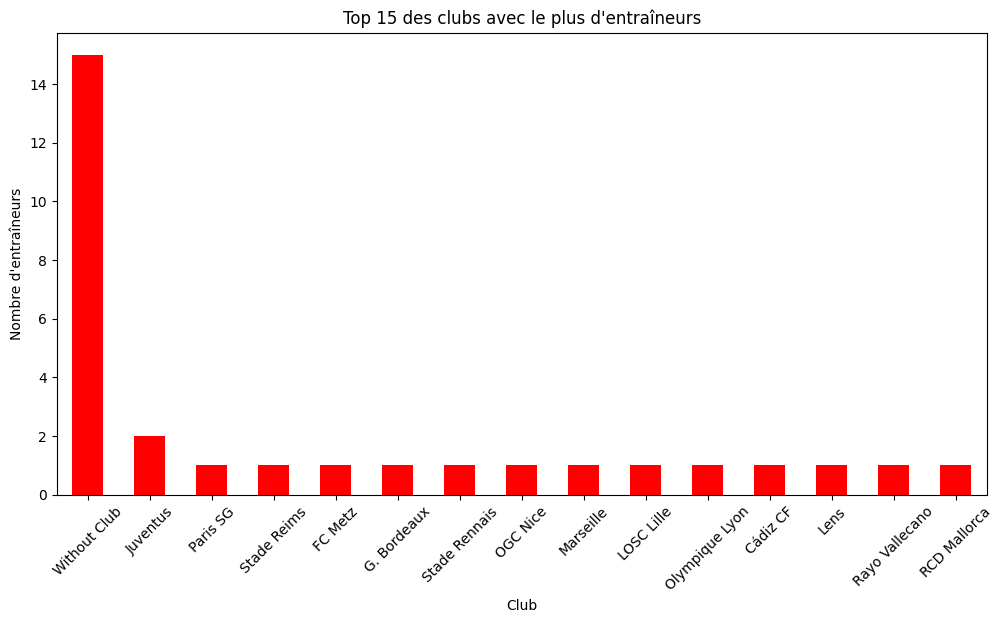

In [22]:

plt.figure(figsize=(12,6))
df["club"].value_counts().nlargest(15).plot(kind='bar', color='red')
plt.title("Top 15 des clubs avec le plus d'entraîneurs")
plt.xlabel("Club")
plt.ylabel("Nombre d'entraîneurs")
plt.xticks(rotation=45)
plt.show()


### 🔹 5. Durée moyenne d'un entraîneur dans un club

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


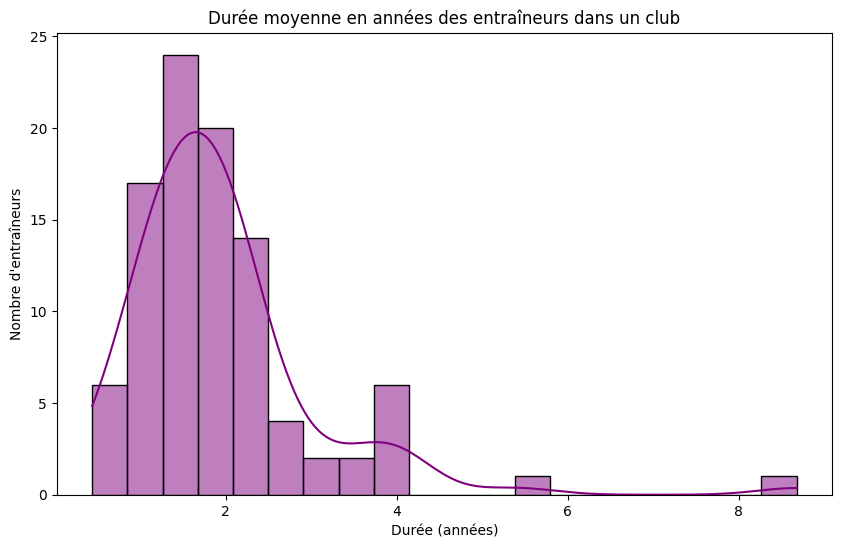

In [23]:

# Conversion de la colonne en float après extraction de la valeur numérique
df["avg_term_as_coach"] = df["avg_term_as_coach"].str.extract('([0-9]+\.?[0-9]*)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(df["avg_term_as_coach"], bins=20, kde=True, color='purple')
plt.title("Durée moyenne en années des entraîneurs dans un club")
plt.xlabel("Durée (années)")
plt.ylabel("Nombre d'entraîneurs")
plt.show()


### 🔹 6. Relation entre l'âge et l'expérience

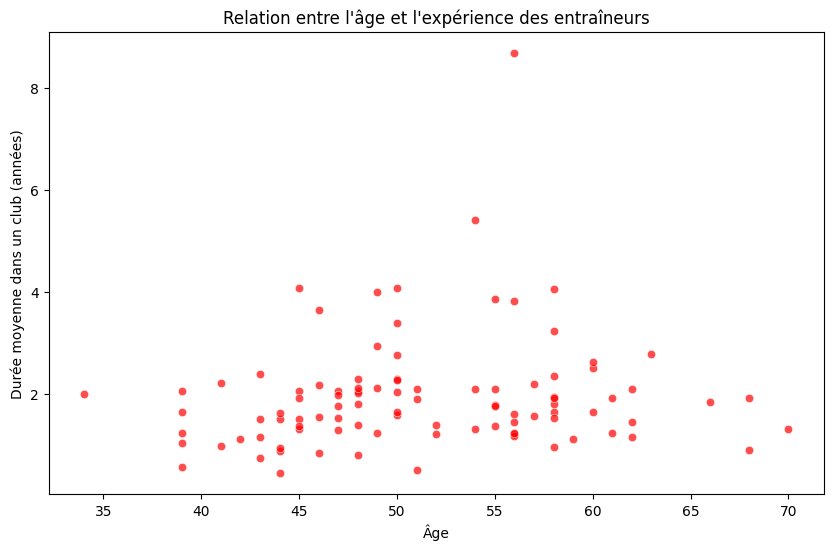

In [24]:

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["age"], y=df["avg_term_as_coach"], alpha=0.7, color='red')
plt.title("Relation entre l'âge et l'expérience des entraîneurs")
plt.xlabel("Âge")
plt.ylabel("Durée moyenne dans un club (années)")
plt.show()


### 🔹 7. Répartition des entraîneurs par pays de la ligue actuelle

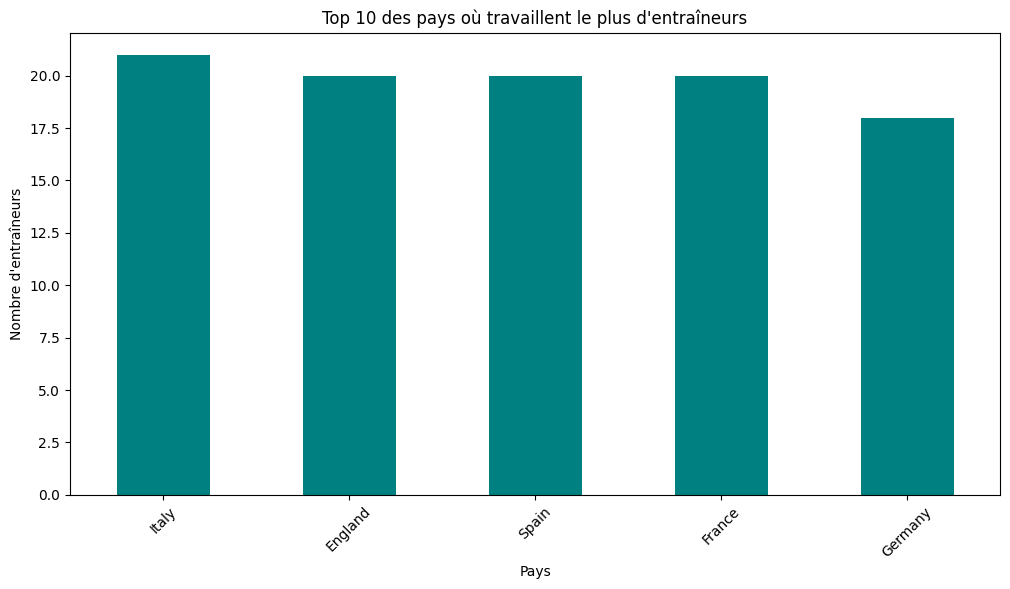

In [25]:

plt.figure(figsize=(12,6))
df["current_league_country"].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title("Top 10 des pays où travaillent le plus d'entraîneurs")
plt.xlabel("Pays")
plt.ylabel("Nombre d'entraîneurs")
plt.xticks(rotation=45)
plt.show()


In [26]:

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


appointment_date       15
contract_until_date    16
avg_term_as_coach       2
preffered_formation     1
dtype: int64

In [35]:
# Vérifier les types avant toute manipulation
print(df.dtypes)

# Remplissage des valeurs manquantes pour les colonnes catégoriques
df['club'] = df['club'].fillna('Without Club')
df['preffered_formation'] = df['preffered_formation'].fillna('Unknown')
df['coaching_licence'] = df['coaching_licence'].fillna('Unknown')

# Assurer que la colonne `avg_term_as_coach` est bien de type string avant d'extraire les valeurs numériques
df['avg_term_as_coach'] = df['avg_term_as_coach'].astype(str)

# Extraction des valeurs numériques et conversion en float
df['avg_term_as_coach'] = df['avg_term_as_coach'].str.extract('([0-9]+\\.?[0-9]*)')[0].astype(float)

# Remplacement des valeurs manquantes dans `avg_term_as_coach` par la médiane
df['avg_term_as_coach'] = df['avg_term_as_coach'].fillna(df['avg_term_as_coach'].median())

# Conversion des dates en format datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['appointment_date'] = pd.to_datetime(df['appointment_date'], errors='coerce')
df['contract_until_date'] = pd.to_datetime(df['contract_until_date'], errors='coerce')
# Remplissage des valeurs manquantes pour les dates
df['appointment_date'].fillna(df['appointment_date'].median(), inplace=True)
df['contract_until_date'].fillna(df['contract_until_date'].median(), inplace=True)


# Vérifier si tout est bien traité
df.info()


name                              object
club                              object
birth_date                datetime64[ns]
age                                int64
place_of_birth                    object
citizenship                       object
appointment_date          datetime64[ns]
contract_until_date       datetime64[ns]
coaching_licence                  object
avg_term_as_coach                float64
preffered_formation               object
current_league                    object
current_league_country            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    99 non-null     object        
 1   club                    99 non-null     object        
 2   birth_date              99 non-null     datetime64[ns]
 3   age                     99 non-null     int64

<ipython-input-35-eb9c9df50ac7>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['appointment_date'].fillna(df['appointment_date'].median(), inplace=True)
<ipython-input-35-eb9c9df50ac7>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [36]:

# Vérifier les valeurs manquantes restantes
df.isnull().sum()


name                      0
club                      0
birth_date                0
age                       0
place_of_birth            0
citizenship               0
appointment_date          0
contract_until_date       0
coaching_licence          0
avg_term_as_coach         0
preffered_formation       0
current_league            0
current_league_country    0
dtype: int64

In [40]:
# Sauvegarde des données nettoyées dans Kaggle
cleaned_file_path = "/kaggle/working/cleaned_coaches.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Fichier sauvegardé avec succès ici : {cleaned_file_path}")


✅ Fichier sauvegardé avec succès ici : /kaggle/working/cleaned_coaches.csv


In [ ]:

# 📌 Matrice de Corrélation des Entraîneurs

# Sélectionner les colonnes numériques
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr_matrix = numeric_df.corr()

# Afficher la heatmap de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Matrice de Corrélation des Variables Numériques")
plt.show()
